<a href="https://colab.research.google.com/github/gillesvtsilvano/odac/blob/master/Evolutive_Systems_ODAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

<em>Online Divisive-Agglomerative Clustering - ODAC.</em>

Baseado em 
RodriguesGamaPedroso.2008.HierarchicalClusteringofTime-SeriesDataStreams.pdf


## Series temporais em agrupamentos de fluxos

Agrupar variáveis que se comportem similarmente através do tempo.

Objetivo é fornecer uma matriz booleanda $ M_{i, j, k}$, que representa se uma variável $M_i$ pertence ao cluster $M_j$ no instante $M_k$.

## Medição incremental de dissimilaridade

Distâncias são incrementalmente computadas utilizando o limite de Hoeffding e a correlação de Pearson.

Tome a correlação entre as séries $a$ e $b$:

$corr(a, b)=\frac{P-\frac{AB}{n}}{\sqrt{A_2- \frac{A^2}{n}} \sqrt{B_2-\frac{B^2}{n} }}$

Onde,

$A=\sum{a_i}, B=\sum{b_i}, C=\sum{c_i}$

No ODAC, é utilizado o _Rooted Normalized One-Minus-Correlation_ dado por:

$rnomc(a, b)=\sqrt{\frac{1-corr(a,b)}{2}}$

Considera-se o <em>diâmetro do cluster</em> a maior dissimilaridade entre duas series temporais pertencentes ao mesmo cluster.

## Aumentando a Hierarquia

O sistema incrementa as estatísticas suficientes para calcular a matriz de dissimilaridade. Quando processando um novo exemplo, somente as folhas são atualizadas.

### Critério de divisão

O critério é o limite de Hoeffding  que é independente de distribuiçõa de probabilidade. Depois de $n$ observações independentes de uma variável aleatória real $r$ de tamanho $R$, com confiança $1-\delta$, a média de $r$ é pelo menos $\bar{r}-\epsilon$, onde $\bar{r}$ é a média observada e $\epsilon$


$\epsilon=\sqrt{\frac{R^2 ln(1/\delta)}{2n}}$


In [11]:
!git clone https://github.com/rodrigoejcm/odac.git
import os

#os.chdir('odac')
!cp odac/requirements.txt .
os.listdir()

Cloning into 'odac'...
remote: Enumerating objects: 44, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 44 (delta 24), reused 28 (delta 11), pack-reused 0
Unpacking objects: 100% (44/44), done.


['.config', 'odac', 'requirements.txt', 'sample_data']

In [12]:
!pip install --upgrade pip
!pip install -r requirements.txt

#!wget http://cs.joensuu.fi/sipu/datasets/s1.txt

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.1)
     |████████████████████████████████| 952kB 4.3MB/s 
     |████████████████████████████████| 17.3MB 39.6MB/s 
     |████████████████████████████████| 71kB 23.5MB/s 
     |████████████████████████████████| 235kB 44.3MB/s 
     |████████████████████████████████| 16.2MB 35.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/6b/e2/88/ffb3e712f4e961427fd2dab733bf86dcd725d35b659fc18072
Successfully built anytree
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: kiwisolver 1.1.0
    Uninstalling kiwisolver-1.1.0:
      Successfully uninstalled kiwisolver-1.1.0
  Found existing installation: numpy 1.16.3
    Uninstalling numpy-1.16.3:
      Successfully uninstalled numpy-1.16.3
  Found existing instal

In [2]:
import pandas as pd
#!head s1.txt
df = pd.read_csv('http://cs.joensuu.fi/sipu/datasets/s1.txt', sep='    ', names=['x', 'y'], nrows=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
df.values[1]
pd.read_csv()

array([665845, 557965])

In [6]:
!python main.py

python3: can't open file 'main.py': [Errno 2] No such file or directory


In [0]:
from skmultiflow.data.regression_generator import RegressionGenerator

r = RegressionGenerator(n_samples=3000, n_features=1, n_informative=2, n_targets=1, random_state=2)

In [0]:
r.prepare_for_use()

In [9]:
for i in range(10):
  print(r.next_sample()[0][0][0])

-0.7220667003612804
0.2418469808969995
0.11828977391570676
0.7565580930299501
0.14164145333083517
-2.3648992500779857
0.9923589852495763
-0.41013674172266634
0.36828174156944365
-0.8862191251508665


#timeseries.py

In [166]:
import pandas as pd

class Timeseries:

  current_value = None   
  df1 = pd.read_csv('http://cs.joensuu.fi/sipu/datasets/s1.txt', sep='    ', names=['x', 'y'])
  df2 = pd.read_csv('http://cs.joensuu.fi/sipu/datasets/s2.txt', sep='    ', names=['x', 'y'])
  df3 = pd.read_csv('http://cs.joensuu.fi/sipu/datasets/s3.txt', sep='    ', names=['x', 'y'])
  df4 = pd.read_csv('http://cs.joensuu.fi/sipu/datasets/s4.txt', sep='    ', names=['x', 'y'])

  df = pd.concat([df1, df2, df3, df4])
  del df1, df2, df3, df4
  
  df = df.sample(frac=1)
  
  idx = 0

  def __init__(self, name):
    self.name = name
    self.next_val()

    #print("TS(", self.idx, ")", self.name , " inicializado com valor: ", self.current_value )

  def next_val(self):
    #self.current_value = float('%.2f'%(self.strem_data_generator.next_sample()[0][0][0]))
    self.current_value = self.df.values[Timeseries.idx]
    Timeseries.idx = Timeseries.idx + 1
    #print('>>> ', Timeseries.idx)
    return self.current_value

def generate_multi_timeseries(n):
  dic_of_timeseries = {}
  for i in range(0,n):
      dic_of_timeseries["S"+str(i)] = Timeseries(name="S"+str(i))
  return dic_of_timeseries


def get_timeseries_next_value(dic_of_timeseries):
  next_values = []
  for key, value in dic_of_timeseries.items():
      next_values.append((key, value.next_val()))
  return next_values


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: ParserWa

#tree.py

In [0]:
from anytree import NodeMixin, RenderTree
from itertools import combinations_with_replacement
from collections import OrderedDict
import numpy as np
from math import sqrt, log

class Statistics:

    def __init__(self, ts_quantity):

        self.reset_sufficient_statistics(ts_quantity)
        self.cluster_diameter = None
        self.dist_dict_coef = {}
        self.hoeffding_bound = None


    def reset_sufficient_statistics(self, ts_quantity):
        self.sum_dict = {}       # key: cluster number
        self.prd_dict = {}       # key: tuple of two cluster numbers
        self.corr_dict = {}      # key: tuple of two cluster numbers
        self.rnomc_dict = {}     # key: tuple of two cluster numbers
        self.n_of_instances = 0
        for i in range(ts_quantity):
            self.sum_dict[i] = 0.
            for j in range(ts_quantity):
                if j >= i:
                    self.prd_dict[(i,j)] = 0.
                    if j > i:
                        self.corr_dict[(i,j)] = 0.
                        self.rnomc_dict[(i,j)] = 0.

    def print(self):
        print("# n_of_instances = {}".format(self.n_of_instances))
        #print("# cluster_diameter = {}".format(self.cluster_diameter))
        #print("# sum_dict:")
        #print(self.sum_dict)
        #print("# prd_dict:")
        #print(self.prd_dict)
        #print("# corr_dict:")
        #print(self.corr_dict)
        #print("# rnomc_dict:")
        #print(self.rnomc_dict)
        #print("# hoeffding_bound = {}".format(self.hoeffding_bound))


class Cluster:

    #def __init__(self, confidence_level = 0.9, n_min = 5, tau = 0.01):
    def __init__(self, confidence_level = 0.9, n_min = 5, tau = 0.1):
        self.active_cluster = True
        self.statistics = None
        self.confidence_level = confidence_level
        self.n_min = n_min
        self.tau = tau


    def set_cluster_timeseries(self,list_ts):
        #self.list_of_timeseries = OrderedDict(sorted(list_ts.items(), key=lambda t: t[0]))
        self.list_of_timeseries = list_ts
        
        cluster_size = len(self.list_of_timeseries)
        self.statistics = Statistics(cluster_size)
        self.update_statistics(init=True) ### does not generate ts samples only calculate matrices


    def get_cluster_timeseries(self):
        return self.list_of_timeseries


    def list_timeseries_names(self):
        return list(self.list_of_timeseries.keys())


    def calcula_sum_dict(self,init=False):

        for k in self.statistics.sum_dict:
            self.statistics.sum_dict[k] = self.statistics.sum_dict[k] \
                + list(self.list_of_timeseries.values())[k].current_value

        return self.statistics.sum_dict


    def calcula_prod_dict(self,init=False):

        for k in self.statistics.prd_dict:
            self.statistics.prd_dict[k] = self.statistics.prd_dict[k] \
                + ( list(self.list_of_timeseries.values())[k[0]].current_value \
                * list(self.list_of_timeseries.values())[k[1]].current_value )

        return self.statistics.prd_dict

    def calcula_corr_dict(self,init=False):

        for k in self.statistics.corr_dict:
            i = k[0]
            j = k[1]
            p = self.statistics.prd_dict[(i,j)]
            a = self.statistics.sum_dict[i]
            a2 = self.statistics.prd_dict[(i,i)]
            b = self.statistics.sum_dict[j]
            b2 = self.statistics.prd_dict[(j,j)]
            n = self.statistics.n_of_instances
            
            a = a.mean()
            a2 = a2.mean()
            b = b.mean()
            b2 = b2.mean()
            
            term_p = p - ((a*b)/n)
            
            term_a = sqrt(a2 - ((a*a)/n))
            term_b = sqrt(b2 - ((b*b)/n))

            self.statistics.corr_dict[(i,j)] = term_p/(term_a*term_b)

        return self.statistics.corr_dict


    def calcula_rnomc_dict(self,init=False):
      max_rnomc = None
      for k in self.statistics.rnomc_dict:
        
        c = 1 - self.statistics.corr_dict[k]
        
        self.statistics.rnomc_dict[k] = sqrt(c.mean())# / 2 )
        
        if max_rnomc is None or self.statistics.rnomc_dict[k] > max_rnomc:
          max_rnomc = self.statistics.rnomc_dict[k]

      self.cluster_diameter = max_rnomc
      
      return self.statistics.rnomc_dict

    def calcula_distances_coefficients(self):
      rnorm_copy = self.statistics.rnomc_dict.copy()
      
      #print(rnorm_copy)
      if (rnorm_copy == {}):
        rnorm_copy = {'': 0}
      
      self.statistics.dist_dict_coef['avg'] = sum(rnorm_copy.values()) / len(rnorm_copy)

      d0_pair = min(rnorm_copy, key=rnorm_copy.get)
      d0 =  rnorm_copy[min(rnorm_copy, key=rnorm_copy.get)]

      self.statistics.dist_dict_coef['d0_val'] = d0
      self.statistics.dist_dict_coef['d0_pair'] = d0_pair

      d1_pair = max(rnorm_copy, key=rnorm_copy.get)
      d1 =  rnorm_copy[max(rnorm_copy, key=rnorm_copy.get)]

      self.statistics.dist_dict_coef['d1_val'] = d1
      self.statistics.dist_dict_coef['d1_pair'] = d1_pair

      rnorm_copy.pop(d1_pair, None)

      if (rnorm_copy):
          ## in case rnorm dict has only one or 2 elements. in that case
          ## we are calculating this but we are not allowed to split.
          ## TODO >>> we can also check the rnorm lenght in the begining.

          d2_pair =  max(rnorm_copy, key=rnorm_copy.get)
          d2 =   rnorm_copy[max(rnorm_copy, key=rnorm_copy.get)]
          self.statistics.dist_dict_coef['d2_val'] = d2
          self.statistics.dist_dict_coef['d2_pair'] = d2_pair
          self.statistics.dist_dict_coef['delta'] = d1-d2
      else:
          self.statistics.dist_dict_coef['d2_val'] = None
          self.statistics.dist_dict_coef['d2_pair'] = None
          self.statistics.dist_dict_coef['delta'] = None


    def calcula_hoeffding_bound(self,init=False):

        r_sqrd = 1  # because the data is normalized
        self.statistics.hoeffding_bound = sqrt(r_sqrd * log(1/self.confidence_level) \
            / (2 * self.statistics.n_of_instances))

        return self.statistics.hoeffding_bound


    def update_statistics(self , init=False):

        if init == False:
            self.get_new_timeseries_values()

        #print("### new observation:", end='')
        #for ts in list(self.list_of_timeseries.values()):
        #    print(", {}".format(ts.current_value), end='')

        self.statistics.n_of_instances += 1

        ### calculate Matrice
        self.calcula_sum_dict()

        ### calculate prod matrix
        self.calcula_prod_dict()

        if self.statistics.n_of_instances >= self.n_min:

            ### calculate Matrice coor
            self.calcula_corr_dict()

            ### calculate Matrice dif
            self.calcula_rnomc_dict()

        # hoeffding bound as epsilon proposed in 3.4.1
        self.calcula_hoeffding_bound()

        # distance parameters needed for checks in 3.4.1 and 3.4.3 of the paper
        self.calcula_distances_coefficients()


        #self.statistics.print()
        #print("")


    def get_new_timeseries_values(self):
        for ts in self.list_of_timeseries.values():
            ts.next_val()


    def get_smaller_distance_with_pivot(self, pivot_1, pivot_2, current):
        """ Look for the distance
        in rnomc_dict given 2 pivots and an index
        """

        ## Following the rule that the dict key present a tuple(x,y) where x < y
        ## here the method max and min are used to find the correct poition
        dist_1 = self.statistics.rnomc_dict[(min(pivot_1,current),max(pivot_1,current))]
        dist_2 = self.statistics.rnomc_dict[(min(pivot_2,current),max(pivot_2,current))]

        return 2 if dist_1 >= dist_2 else 1


    def split_this_cluster(self, pivot_1, pivot_2):
        print('split this cluster')
        pivot_1_list = {}

        temp_1 = list(self.list_of_timeseries.items())[pivot_1]
        pivot_1_list[temp_1[0]] = temp_1[1]

        pivot_2_list = {}

        temp_2 = list(self.list_of_timeseries.items())[pivot_2]
        pivot_2_list[temp_2[0]] = temp_2[1]

        for i in range(len(self.list_of_timeseries.values())):
            if (i != pivot_1) & (i != pivot_2):
                cluster = self.get_smaller_distance_with_pivot(pivot_1,pivot_2,i)
                if cluster == 1:
                    temp_1 = list(self.list_of_timeseries.items())[i]
                    pivot_1_list[temp_1[0]] = temp_1[1]
                else: #2
                    temp_2 = list(self.list_of_timeseries.items())[i]
                    pivot_2_list[temp_2[0]] = temp_2[1]

        ### After creating 2 lists based on 2 pivots, its time
        ### to creates the new nodes and set self as the parent node

        ## this is just to create the node name.
        ## this is irrelevant...
        if(self.name == 'root_node'):
            new_name = "1"
        else:
            new_name = str(int(self.name[8:]) + 1)
            print(new_name)

        cluster_child_1 = Node_of_tree('CH1_LVL_'+new_name, parent=self)
        cluster_child_1.set_cluster_timeseries(pivot_1_list)

        cluster_child_2 = Node_of_tree('CH2_LVL_'+new_name, parent=self)
        cluster_child_2.set_cluster_timeseries(pivot_2_list)

        ### Finally, the current cluster is deactivated.

        self.active_cluster = False


    def aggregate_this_cluster(self):
        print('agregate this cluster')
        self.parent.statistics.reset_sufficient_statistics(len(self.list_of_timeseries))
        self.children = []
        self.active_cluster = True


    def test_split(self):
        #print('test split: {} >= {} and {} not None'.format(self.statistics.n_of_instances, self.n_min, self.statistics.dist_dict_coef['d2_val']))
        if self.statistics.n_of_instances >= self.n_min and self.statistics.dist_dict_coef['d2_val'] is not None:
            d0 = float(self.statistics.dist_dict_coef['d0_val'])
            d1 = float(self.statistics.dist_dict_coef['d1_val'])
            d2 = float(self.statistics.dist_dict_coef['d2_val'])
            avg = float(self.statistics.dist_dict_coef['avg'])
            t = float(self.tau)
            e =  float(self.statistics.hoeffding_bound)

            
            
            ### following 3.4.4 Split Algorithm
            if ( (d1 - d2) > e ) | ( t > e ):
                #print("### FIRST CONDITION MET")
                
                if ( (d1 - d0) * abs((d1 - avg) - (avg - d0)) ) > e:

                    x1 = self.statistics.dist_dict_coef['d1_pair'][0]
                    y1 = self.statistics.dist_dict_coef['d1_pair'][1]

                    print("#################")
                    print("##### SPLIT #####")
                    print("#################")
                    print(" >>> PIVOT: ", x1,y1)
                    print("#################")

                    self.split_this_cluster(pivot_1 = x1, pivot_2 = y1)

                    return True
        return False


    def test_aggregate(self):
        if self.parent is not None:

            if self.statistics.dist_dict_coef['d1_val'] - self.parent.statistics.dist_dict_coef['d1_val'] \
                > max(self.statistics.hoeffding_bound, self.parent.statistics.hoeffding_bound):

                print("#################")
                print("##### AGGR. #####")
                print("#################")

                #print("checking: c_k={} c_j={} e_k={} e_j={}".format( \
                #    self.statistics.dist_dict_coef['d1_val'], \
                #    self.parent.statistics.dist_dict_coef['d1_val'], \
                #    self.statistics.hoeffding_bound, \
                #    self.parent.statistics.hoeffding_bound))

                self.parent.aggregate_this_cluster()

                return True
        return False




class Node_of_tree(Cluster, NodeMixin):  # Extension to class Cluster to use tree structure
    def __init__(self, name, parent=None, children=None):
        super(Node_of_tree, self).__init__()
        self.name = name
        self.parent = parent
        if children:
             self.children = children

#main.py

In [168]:

from anytree.search import findall
from anytree import RenderTree

Timeseries.idx = 0

#series = generate_multi_timeseries(n=200)
series = generate_multi_timeseries(n=200)


Timeseries.idx = 0

### Initialize root node of the tree ( the initial cluster )
### and tet timeseries to initial cluster
root_node = Node_of_tree('root_node')
root_node.set_cluster_timeseries(series)

### example run 10 times:
### for each active cluster - get next value for each series inside the cluster and
### calculate and update statistics

for i in range(100):
    for active_cluster in findall(root_node,filter_=lambda node: node.active_cluster is True):
      active_cluster.update_statistics()
      if active_cluster.test_split() or active_cluster.test_aggregate():
        print("tree at observation #{}".format(i))
        for pre, fill, node in RenderTree(root_node):
          print("%s%s %f %s" % (pre, node.name, node.statistics.dist_dict_coef['d1_val'], node.list_timeseries_names() if node.active_cluster else " [NOT ACTIVE]" ))
          #print("######")
          #print(node.list_timeseries_names())
          #print(node)
          #print(node.get_cluster_timeseries().keys())

#################
##### SPLIT #####
#################
 >>> PIVOT:  26 111
#################
split this cluster
tree at observation #4
root_node 1.391565  [NOT ACTIVE]
dict_keys(['S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11', 'S12', 'S13', 'S14', 'S15', 'S16', 'S17', 'S18', 'S19', 'S20', 'S21', 'S22', 'S23', 'S24', 'S25', 'S26', 'S27', 'S28', 'S29', 'S30', 'S31', 'S32', 'S33', 'S34', 'S35', 'S36', 'S37', 'S38', 'S39', 'S40', 'S41', 'S42', 'S43', 'S44', 'S45', 'S46', 'S47', 'S48', 'S49', 'S50', 'S51', 'S52', 'S53', 'S54', 'S55', 'S56', 'S57', 'S58', 'S59', 'S60', 'S61', 'S62', 'S63', 'S64', 'S65', 'S66', 'S67', 'S68', 'S69', 'S70', 'S71', 'S72', 'S73', 'S74', 'S75', 'S76', 'S77', 'S78', 'S79', 'S80', 'S81', 'S82', 'S83', 'S84', 'S85', 'S86', 'S87', 'S88', 'S89', 'S90', 'S91', 'S92', 'S93', 'S94', 'S95', 'S96', 'S97', 'S98', 'S99', 'S100', 'S101', 'S102', 'S103', 'S104', 'S105', 'S106', 'S107', 'S108', 'S109', 'S110', 'S111', 'S112', 'S113', 'S114', 'S115', 'S11

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


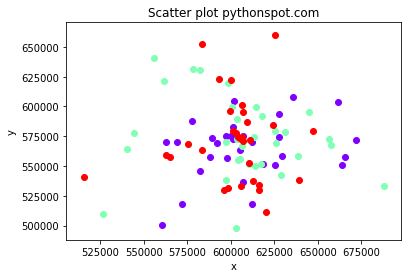

In [43]:
import matplotlib.pyplot as plt
from math import ceil
import matplotlib.cm as cm

# Create data
N = df.x.size
n = int(ceil(N/3))
xs = [df.x.values[:n], df.x.values[n:2*n], df.x.values[2*n:]]
ys = [df.y.values[:n], df.y.values[n:2*n], df.y.values[2*n:]]
colors = cm.rainbow(np.linspace(0, 1, len(ys)))

#area = np.pi*3
 
# Plot
# plt.scatter(x, y, s=area, c=colors, alpha=0.5)
for x, y, color in zip(xs, ys, colors):
  plt.scatter(x, y, c=color.tolist())
 
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [0]:
df.index.values

array([   0,    1,    2, ..., 4997, 4998, 4999])

In [14]:
!ls odac

main.py  README.md  requirements.txt  timeseries.py  tree.py


138965

139474